# Notebook for "Student Stress Analysis"
Amanda Curtis 

Started August 25th, 2025
Continued on September 1st

In [1]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("whitegrid")

## Table of Contents 
1. First Check and Cleaning 
2. Train / Test / Split
3. EDA #1
4. EDA #2
5. Feature Selection 

## First Check and Cleaning

For our first step, we import the data to the notebook. This data was obtained from Kaggle.com 

(link: https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets/data )

### Data Set 1

In [2]:
stress_1 = pd.read_csv("data/Stress_Dataset.csv")
stress_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             843 non-null    int64 
 7   Have you

In [12]:
# Check for duplicates 
duplicate_rows = stress_1[stress_1.duplicated()]
print("All duplicate rows:")
print(duplicate_rows)

All duplicate rows:
     Gender  Age  Have you recently experienced stress in your life?  \
534       0   20                                                  5    
566       1   17                                                  3    
568       0   21                                                  4    
571       0   21                                                  3    
572       0   21                                                  3    
622       0   19                                                  1    
625       0   20                                                  2    
626       0   19                                                  2    
724       0   22                                                  2    
725       0   21                                                  1    
726       0   22                                                  4    
727       0   20                                                  1    
729       0   22                            

Notes on Stress_1: 

1. No missing values 
2. Integer values aside from last column (which is object)
3. 843 rows
4. 27 Dumplicated rows - what to do with those (edit: duplicates eliminated on 9/1)

In [ ]:
# Dropping Duplicate Rows

unique_stress_1 = stress_1.drop_duplicates()
unique_stress_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                816 non-null    int64 
 1   Age                                                                   816 non-null    int64 
 2   Have you recently experienced stress in your life?                    816 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   816 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               816 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        816 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             816 non-null    int64 
 7   Have you been

Given the new number of rows (816), I will conclude that the duplicates are gone. 

### Data Set 2

In [6]:
stress_2 = pd.read_csv("data/StressLevelDataset.csv")
stress_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

Notes on Stress_2: 

1. No missing values 
2. all integer values 
3. 1100 Rows

## Train / Test / Split

In [7]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train/Test/Split on Data Set 1
stress1_train, stress1_test = train_test_split(unique_stress_1,
                                            test_size=0.2,
                                            random_state=805,
                                            shuffle=True)
# Verifying relative sizes of data sets 
assert(stress1_train.shape[0] == int(unique_stress_1.shape[0]*0.8))

In [ ]:
# writing the first sets into csv files 
# will move them to a better spot later

stress1_train.to_csv('Stress1_Train.csv', index=False)
stress1_test.to_csv('Stress1_Test.csv', index=False)

In [ ]:
# Train/Test/Split on Data Set 2
stress2_train, stress2_test = train_test_split(stress_2,
                                            test_size=0.2,
                                            random_state=805,
                                            shuffle=True)
# Verifying relative sizes of data sets 
assert(stress2_train.shape[0] == int(stress_2.shape[0]*0.8))

In [13]:
# Writing the second sets
# again, will move later if needed 

stress2_train.to_csv('Stress2_Train.csv', index=False)
stress2_test.to_csv('Stress2_Test.csv', index=False)

## EDA 

In [18]:
# Turning training files into dataframes 

df1 = pd.read_csv('Stress1_Train.csv')
df2 = pd.read_csv('Stress2_Train.csv')

# dropping a column from the first set (which gives a string label for type of stress) 
df1.drop(columns=['Which type of stress do you primarily experience?'], inplace=True)



                                                      Gender       Age  \
Gender                                              1.000000 -0.026528   
Age                                                -0.026528  1.000000   
Have you recently experienced stress in your life? -0.024885  0.109985   
Have you noticed a rapid heartbeat or palpitati... -0.065046 -0.021798   
Have you been dealing with anxiety or tension r... -0.013989 -0.035074   
Do you face any sleep problems or difficulties ... -0.016136 -0.005746   
Have you been dealing with anxiety or tension r... -0.032318 -0.003657   
Have you been getting headaches more often than...  0.010657  0.060254   
Do you get irritated easily?                        0.002972  0.004162   
Do you have trouble concentrating on your acade...  0.015570  0.021629   
Have you been feeling sadness or low mood?          0.033598  0.092264   
Have you been experiencing any illness or healt... -0.012170  0.035568   
Do you often feel lonely or isolated? 

<Axes: >

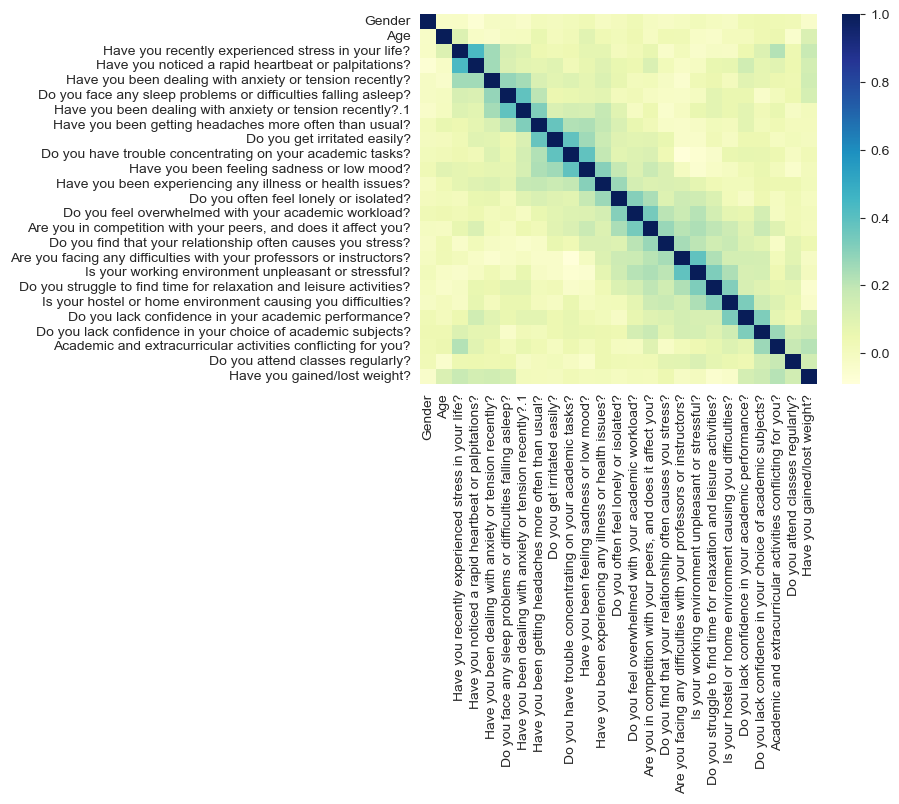

In [27]:
# First, setting up for some correlation heat maps
# creating correlation matrix 
co_mtx_1 = df1.corr(numeric_only=True)
# checking out the matrix
print(co_mtx_1)
# creating heatmap
sns.heatmap(co_mtx_1, cmap="YlGnBu")

Some Notes: 

1. Without the type of stress/markers, it may be hard to figure something out here, so I might want to consider looking at labeling algorithms for this data. 
2. Recent Stress and conflict between academic and extra curricular activities have a mild to moderate postive correlation 
3. Other mild correlations: stress/palpitations, tension/trouble sleeping, low mood/difficulty concentrating 

                              anxiety_level  self_esteem  \
anxiety_level                      1.000000    -0.680822   
self_esteem                       -0.680822     1.000000   
mental_health_history              0.632194    -0.609975   
depression                         0.699911    -0.700776   
headache                           0.626363    -0.615776   
blood_pressure                     0.346068    -0.509113   
sleep_quality                     -0.705003     0.662155   
breathing_problem                  0.556950    -0.513278   
noise_level                        0.609898    -0.580926   
living_conditions                 -0.560723     0.541081   
safety                            -0.657063     0.663806   
basic_needs                       -0.647214     0.628697   
academic_performance              -0.649364     0.637712   
study_load                         0.585320    -0.590755   
teacher_student_relationship      -0.672309     0.650299   
future_career_concerns             0.709

<Axes: >

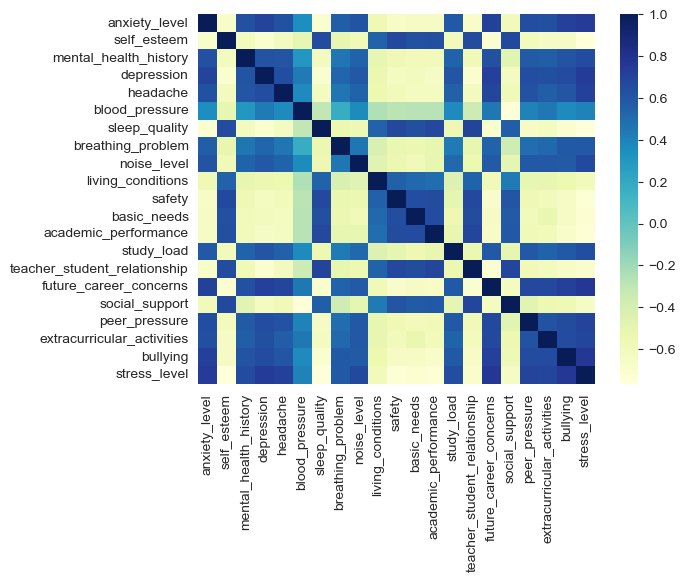

In [28]:
# Second data set heat map set up 
# creating correlation matrix 
co_mtx_2 = df2.corr(numeric_only=True)
# checking out correlation matrix
print(co_mtx_2)
# creating heatmap 
sns.heatmap(co_mtx_2, cmap="YlGnBu")

Some notes: 
1. More grouping of features/markers here than with previous data 
2. Groups/clusters include: mental health history/depression/headache, living conditions/basic needs/academic performance, and peer pressure/extra curriculuars/bullying/stresslevel
3. Stress level is quantified here, so we can quickly see which individual columns are most highly correlated to it (they are: anxiety_level, mental_health_history, depression, headache, blood_pressure, breathing_problems, noise_level, study_load, future_career_concerns, peer_pressure, extracurricular_activities, bullying )

## EDA (Day 2) 

### Data Set 1 

Since I may want to use the labels again, I will go ahead and bring back the originial Data Set. Later, I will look into more Machine Learning related labeling systems. For now, this is just some EDA, I think?


#### Attempting PCA 
which requires some normalization and what not. 

In [ ]:
# Loading Scikit-learn and other stuff 
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d